In [1]:
import numpy as np
from sklearn import datasets, metrics, model_selection
from sklearn import tree

## 数据集：鸢尾花分类

In [2]:
iris = datasets.load_iris()
# print(dir(iris))  # ['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']
# print('data shape', iris.data.shape)  # data shape (150, 4)
# print('target shape', iris.target.shape)  # target shape (150,)
# print('feature names:', iris.feature_names)  # feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
# print('kinds:', np.unique(iris.target))  # 品种数量kinds: [0 1 2]

In [3]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(
    iris.data, iris.target, test_size=0.1, random_state=42
)

## 创建空决策树

In [4]:
dtc = tree.DecisionTreeClassifier()

### 训练

In [5]:
dtc.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### 测试

In [6]:
y_pred = dtc.predict(x_test)
print(y_pred)
print(y_test)
print(y_pred == y_test)

# score: 准确率
print(dtc.score(x_train, y_train))
print(dtc.score(x_test, y_test))

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0]
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True]
1.0
1.0


## 可视化

In [ ]:
# 决策树可视化
import pydotplus

dot_data = tree.export_graphviz(dtc, out_file=None, feature_names=iris.feature_names, class_names=iris.target_names)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png("tree.png")

![jupyter](./tree.png)

# 特征重要性评估

[0.02964427 0.         0.54987651 0.42047922]


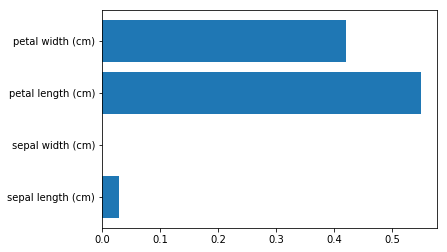

In [7]:
# 特征重要性评估
import matplotlib.pyplot as plt
%matplotlib inline

print(dtc.feature_importances_)
plt.barh(range(4), dtc.feature_importances_, align='center', tick_label=iris.feature_names)
plt.show()